In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data analysis

In [4]:
#checking shape of the dataset
df.shape

(891, 12)

In [5]:
###checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

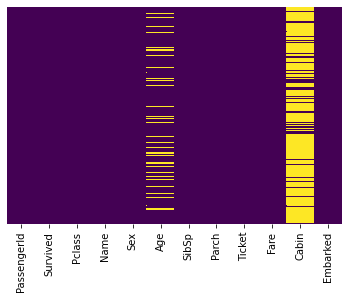

In [6]:
#lets visualize the missing values using heatmap
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

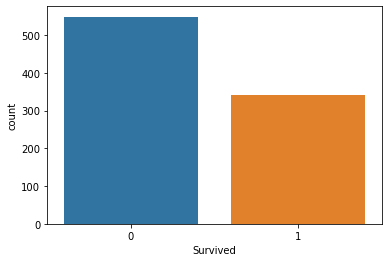

In [7]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

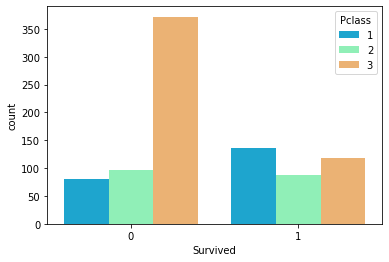

In [8]:
#visualizing survived based on class
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

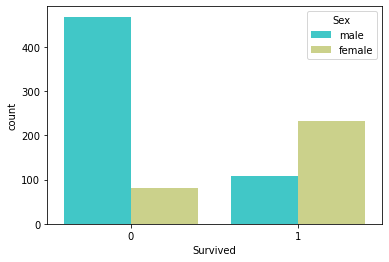

In [9]:
#visualizing survived based on sex(male/female)
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

# Dealing with null valiues

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

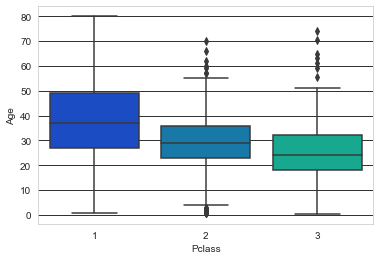

In [10]:
sns.set_style('whitegrid', {'grid.color': 'black'})
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

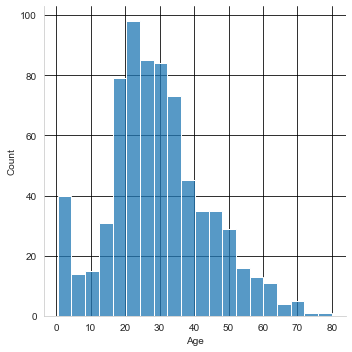

In [11]:
sns.displot(df['Age'])

In [12]:
#filling the null values with mean of the total column
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#droping the cabin column because most of the data from this column are null value 
df.drop(['Cabin'] ,axis=1 , inplace= True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#filling the null values of embarked column with mode because its a categorical column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Descriptive analysis

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#converting categorical values into dummy variables
df['Sex'] =pd.get_dummies(df['Sex'])
df['Embarked'] =pd.get_dummies(df['Embarked'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [21]:
#we need to drop (passengerId,Name,Ticket) because the preson's survival doesn't depends on this features.
df = df.drop(['PassengerId','Name','Ticket'],axis=1)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [23]:
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.592240,1,0,-0.312011,0
1,1,1,1,0.638529,1,0,2.461242,1
2,1,3,1,-0.284548,0,0,-0.282777,0
3,1,1,1,0.407760,1,0,1.673732,0
4,0,3,0,0.407760,0,0,-0.277363,0


In [24]:
#assigning the feature and target values
y = df[['Survived']]
x = df.drop(['Survived'],axis=1)

In [25]:
##split the data into train and test 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)


# Model Building

# Logistic Regression

In [26]:
#using logistic regression algo
from sklearn.linear_model import LogisticRegression

In [27]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [28]:
#calculate train accuracy
train_accuracy = model_logistic.score(x_train, y_train)
print('train_accuracy_of_LR',train_accuracy)

train_accuracy_of_LR 0.797752808988764


In [29]:
#calculate train accuracy
test_accuracy = model_logistic.score(x_test, y_test)
print('test_accuracy_of_LR',test_accuracy)

test_accuracy_of_LR 0.8212290502793296


In [30]:
#lets do cross validation of the dataset using logistic regression
from sklearn.model_selection import cross_val_score


In [31]:
cross_val_scores = cross_val_score(model_logistic, x, y, cv=5)
cross_val_scores

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

array([0.77653631, 0.78651685, 0.78089888, 0.76404494, 0.82022472])

In [32]:
#calculating avverage cross value score for logistic regression
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_Logistic_regression',cross_val_scores)

cross_val_score_Logistic_regression 0.7856443412215178


# Random Forest Classifier

In [33]:
#using random forest classifier algo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [34]:
model_Rf_classifier = RandomForestClassifier(n_estimators=100 ,max_depth=5,min_samples_split=4,min_samples_leaf=2)
model_Rf_classifier.fit(x_train,y_train)

<ipython-input-34-30dcc15816af>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Rf_classifier.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4)

In [35]:
train_accuracy = model_Rf_classifier.score(x_train, y_train)
print('train_accuracy_of_rf_classifier',  train_accuracy)

train_accuracy_of_rf_classifier 0.8455056179775281


In [36]:
test_accuracy = model_Rf_classifier.score(x_test, y_test)
print('test_accuracy_of_rf_classifier',  test_accuracy)

test_accuracy_of_rf_classifier 0.8435754189944135


In [37]:
#checking cross validation of rf_classifier model
cross_val_scores = cross_val_score(model_Rf_classifier, x, y, cv=10)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

In [38]:
cross_val_scores

array([0.8       , 0.80898876, 0.7752809 , 0.8988764 , 0.8988764 ,
       0.78651685, 0.82022472, 0.78651685, 0.87640449, 0.83146067])

In [39]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_rf_classifier',cross_val_scores)

cross_val_score_rf_classifier 0.828314606741573


# Support Vactor Machine

In [40]:
#using support vactor machine algorithm
from sklearn.svm import SVC

In [41]:
model_svc = SVC(kernel='poly',gamma='auto')
model_svc.fit(x_train,y_train)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(gamma='auto', kernel='poly')

In [42]:
train_accuracy =model_svc.score(x_train,y_train)
print('train_accuracy_SVM' ,   train_accuracy)

train_accuracy_SVM 0.8286516853932584


In [43]:
test_accuracy = model_svc.score(x_test,y_test)
print('test_accuracy_svm' ,   test_accuracy)

test_accuracy_svm 0.8268156424581006


In [44]:
#checking cross validation of svm
cross_val_scores = cross_val_score(model_svc, x, y, cv=20)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

In [45]:
cross_val_scores

array([0.75555556, 0.84444444, 0.8       , 0.88888889, 0.77777778,
       0.8       , 0.8       , 0.93333333, 0.88888889, 0.8       ,
       0.82222222, 0.75      , 0.75      , 0.81818182, 0.77272727,
       0.72727273, 0.84090909, 0.90909091, 0.81818182, 0.88636364])

In [46]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_svm',cross_val_scores)

cross_val_score_svm 0.8191919191919192


# KNN Algorithm 

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model_knn= KNeighborsClassifier(n_neighbors=7, metric='manhattan', p=2 )  
model_knn.fit(x_train, y_train)  

<ipython-input-48-0f4c1c051729>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [49]:
train_accuracy =model_knn.score(x_train,y_train)
print('train_accuracy_knn' ,   train_accuracy)

train_accuracy_knn 0.8441011235955056


In [50]:
test_accuracy = model_knn.score(x_test,y_test)
print('test_accuracy_knn' ,   test_accuracy)

test_accuracy_knn 0.8212290502793296


In [51]:
cross_val_scores = cross_val_score(model_knn, x, y, cv=7)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed 

In [52]:
cross_val_scores

array([0.734375  , 0.7890625 , 0.78740157, 0.82677165, 0.83464567,
       0.78740157, 0.79527559])

In [53]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_knn',cross_val_scores)

cross_val_score_knn 0.7935619375703037


# Decision Tree Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model_DT = DecisionTreeClassifier(max_depth=8,min_samples_split=3,min_samples_leaf=5)
model_DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=3)

In [56]:
train_accuracy =model_DT.score(x_train,y_train)
print('train_accuracy_DT' ,   train_accuracy)

train_accuracy_DT 0.8693820224719101


In [57]:
test_accuracy =model_DT.score(x_test,y_test)
print('test_accuracy_DT' ,   test_accuracy)

test_accuracy_DT 0.8547486033519553


In [58]:
cross_val_scores = cross_val_score(model_DT, x, y, cv=25)
cross_val_scores

array([0.69444444, 0.83333333, 0.88888889, 0.77777778, 0.91666667,
       0.75      , 0.77777778, 0.83333333, 0.94444444, 0.91666667,
       0.86111111, 0.91666667, 0.86111111, 0.86111111, 0.88888889,
       0.77777778, 0.88571429, 0.88571429, 0.77142857, 0.82857143,
       0.85714286, 0.85714286, 0.82857143, 0.8       , 0.97142857])

In [59]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_DT',cross_val_scores)

cross_val_score_DT 0.8474285714285714


# Ada-Boost Training Algorithm

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
model_adboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.2)

In [62]:
model_adboost.fit(x_train,y_train)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(learning_rate=0.2, n_estimators=150)

In [63]:
train_accuracy =model_adboost.score(x_train,y_train)
print('train_accuracy_AdaBoost' ,   train_accuracy)

train_accuracy_AdaBoost 0.8202247191011236


In [64]:
test_accuracy =model_adboost.score(x_test,y_test)
print('test_accuracy_AdaBoost' ,   test_accuracy)

test_accuracy_AdaBoost 0.8435754189944135


In [65]:
cross_val_scores = cross_val_score(model_adboost, x, y, cv=5)
cross_val_scores

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

array([0.75418994, 0.81460674, 0.80337079, 0.81460674, 0.83146067])

In [66]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_Adaboost',cross_val_scores)

cross_val_score_Adaboost 0.8036469775908606


# XGBoost Training Algorithm

In [67]:
import xgboost as xgb

In [68]:
model_xgboost = xgb.XGBClassifier(n_estimators=150, learning_rate=0.3, max_depth=3,min_child_weight=2,gamma=0.4)
model_xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
train_accuracy =model_xgboost.score(x_train,y_train)
print('train_accuracy_xgboost' ,   train_accuracy)

train_accuracy_xgboost 0.8820224719101124


In [70]:
test_accuracy =model_xgboost.score(x_test,y_test)
print('test_accuracy_xgboost' ,   test_accuracy)

test_accuracy_xgboost 0.8603351955307262


In [71]:
cross_val_scores = cross_val_score(model_xgboost, x, y, cv=13)
cross_val_scores

array([0.8115942 , 0.82608696, 0.85507246, 0.7826087 , 0.88405797,
       0.85507246, 0.89855072, 0.85294118, 0.83823529, 0.83823529,
       0.79411765, 0.79411765, 0.86764706])

In [72]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_XGBoost',cross_val_scores)

cross_val_score_XGBoost 0.8383336612236868


# Gredient Boosting Algorithm

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
model_gdboost = GradientBoostingClassifier(n_estimators=120,learning_rate=0.1,max_depth=2)
model_gdboost.fit(x_train,y_train)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(max_depth=2, n_estimators=120)

In [75]:
train_accuracy =model_gdboost.score(x_train,y_train)
print('train_accuracy_Gradient' ,   train_accuracy)

train_accuracy_Gradient 0.8539325842696629


In [76]:
test_accuracy =model_gdboost.score(x_test,y_test)
print('test_accuracy_Gradient' ,   test_accuracy)

test_accuracy_Gradient 0.8324022346368715


In [77]:
cross_val_scores = cross_val_score(model_gdboost, x, y, cv=20)
cross_val_scores

C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

array([0.73333333, 0.86666667, 0.84444444, 0.84444444, 0.77777778,
       0.77777778, 0.82222222, 0.91111111, 0.91111111, 0.8       ,
       0.82222222, 0.79545455, 0.75      , 0.86363636, 0.81818182,
       0.77272727, 0.79545455, 0.90909091, 0.79545455, 0.86363636])

In [78]:
cross_val_scores = np.mean(cross_val_scores)
print('cross_val_score_Adaboost',cross_val_scores)

cross_val_score_Adaboost 0.8237373737373737


# Predicting On Test Dataset

In [79]:
df_test = pd.read_csv('test.csv')

In [80]:
df_test.shape

(418, 11)

In [81]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test.drop(['Cabin'] ,axis=1 , inplace= True)

In [84]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
df_test.shape

(418, 10)

# Descriptive Statistic

In [86]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [87]:
df_test['Sex'] =pd.get_dummies(df['Sex'])
df_test['Embarked'] =pd.get_dummies(df['Embarked'])
df_test = df_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [88]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [89]:
df_test['Age'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare'] = scaler.fit_transform(df_test[['Fare']])

In [90]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.331562,0,0,-0.280670,1
1,3,0,1.311954,1,0,-0.315800,0
2,2,0,2.488424,0,0,-0.201943,1
3,3,0,-0.256674,0,0,-0.245367,1
4,3,1,-0.648831,1,1,-0.091793,1


In [91]:
survived = model_Rf_classifier.predict(df_test)
survived

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [92]:
df_test1 = pd.read_csv('test.csv')
df_test1.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
df1 = df_test1[['PassengerId']]
df1['Survived'] = pd.DataFrame(survived)

<ipython-input-93-3ecd2c06cdf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Survived'] = pd.DataFrame(survived)


In [94]:
df1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [95]:
survived = model_logistic.predict(df_test)
df2 = df_test1[['PassengerId']]
df2['Survived'] = pd.DataFrame(survived)
df2

<ipython-input-95-010959d821cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [96]:
survived = model_svc.predict(df_test)
df3 = df_test1[['PassengerId']]
df3['Survived'] = pd.DataFrame(survived)
df3

<ipython-input-96-ddf4b6554a82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [97]:
df3.to_csv('svc_new.csv')

In [98]:
survived = model_knn.predict(df_test)
df4 = df_test1[['PassengerId']]
df4['Survived'] = pd.DataFrame(survived)
df4

<ipython-input-98-e5eb921928d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [99]:
df2.to_csv('Knn_2.csv')

In [100]:
survived = model_DT.predict(df_test)
df5 = df_test1[['PassengerId']]
df5['Survived'] = pd.DataFrame(survived)
df5

<ipython-input-100-1b10633d269e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [101]:
survived = model_adboost.predict(df_test)
df6 = df_test1[['PassengerId']]
df6['Survived'] = pd.DataFrame(survived)
df6

<ipython-input-101-58bf0cf01850>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [102]:
survived = model_xgboost.predict(df_test)
df7 = df_test1[['PassengerId']]
df7['Survived'] = pd.DataFrame(survived)
df7

<ipython-input-102-740faabfe37a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [103]:
survived = model_gdboost.predict(df_test)
df8 = df_test1[['PassengerId']]
df8['Survived'] = pd.DataFrame(survived)
df8

<ipython-input-103-b5d05cda2c7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Survived'] = pd.DataFrame(survived)


,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [104]:
1

1